# Question 4

In [83]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O Lenna.png

--2021-02-18 11:08:11--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.08s   

2021-02-18 11:08:11 (5.49 MB/s) - ‘Lenna.png’ saved [473831/473831]



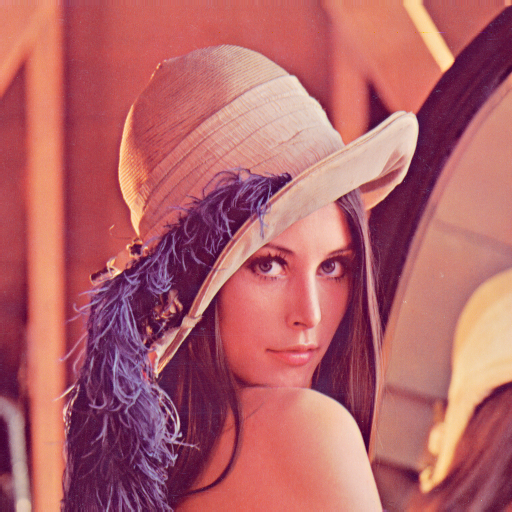

In [84]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread("Lenna.png")
cv2_imshow(img)

In [85]:
def bilinear_scaling(img,scale):
  scaled=np.zeros((int((img.shape[0]-1)*scale+1),int((img.shape[1]-1)*scale+1),3))
  for i in range(scaled.shape[0]):
    for j in range(scaled.shape[1]):
      a = i/scale; b = j/scale
      x0 = int (a); y0 = int (b)
      x1 = x0+1; y1 = y0+1
      if a==x0 and b==y0:
        scaled[i][j] = img[x0][y0]
      elif a!=x0 and b==y0:
        scaled[i][j] = np.round ( img[x0][y0]*(x0+1-a) + img[x0+1][y0]*(a-x0) )
      elif a==x0 and b!=y0:
        a = i/scale
        b = j/scale
        x = int (a)
        y = int (b)
        scaled[i][j] = np.round ( img[x0][y0]*(y+1-b) + img[x0][y0+1]*(b-y0) )
      else:
        scaled[i][j] = np.round ( img[x0][y0]*(x1-a)*(y1-b) + img[x0][y1]*(x1-a)*(b-y0) + img[x1][y0]*(a-x0)*(y1-b) + img[x1][y1]*(a-x0)*(b-y0) )
  # scaled=np.rint(scaled)
  scaled=scaled.astype(np.uint8)
  return scaled


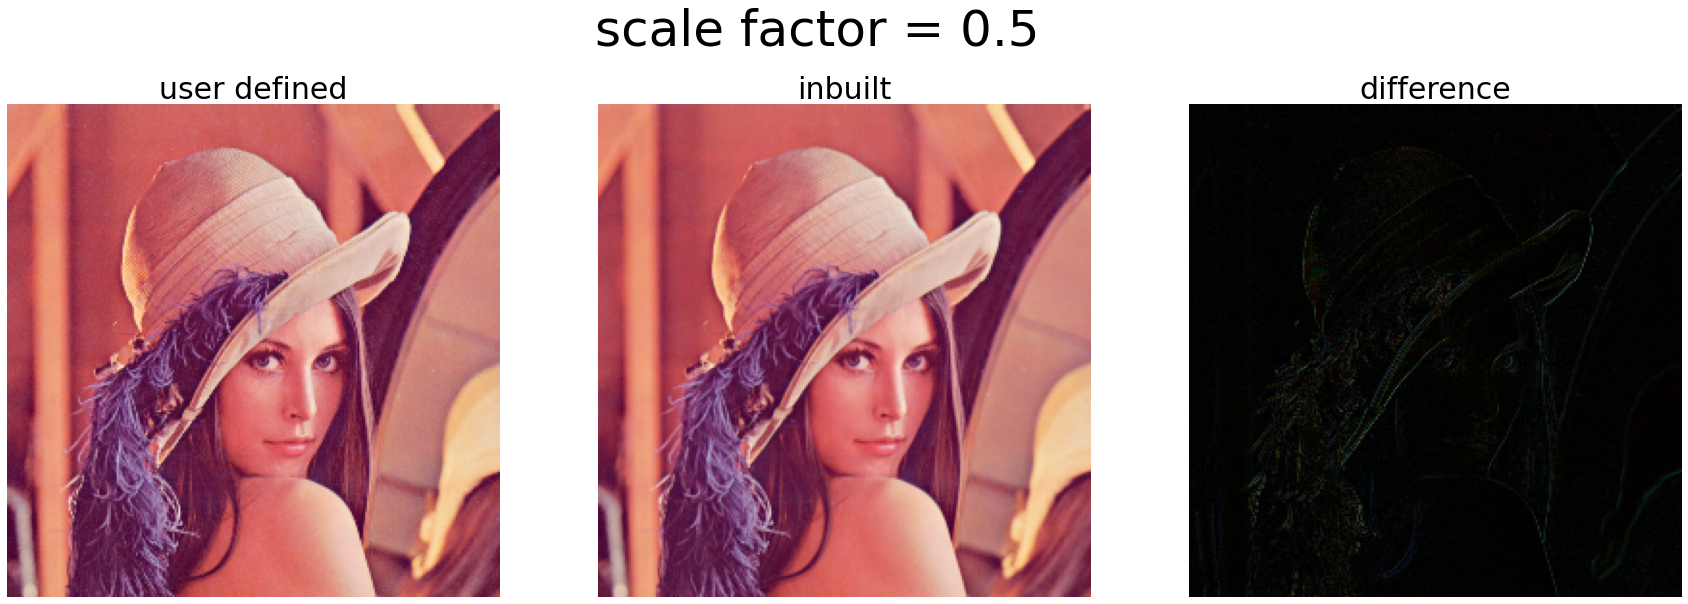

mean error (difference from the output of inbuilt function) = 13.29 or 5.21%


In [82]:
fig,(user_defined,inbuilt,difference)=plt.subplots(nrows=1,ncols=3,figsize=(30,10))
fig.suptitle("scale factor = 0.5",fontsize=50)
user_defined.axis('off')
inbuilt.axis('off')
difference.axis('off')
user_defined.set_title('user defined',fontsize=30)
inbuilt.set_title('inbuilt',fontsize=30)
difference.set_title('difference',fontsize=30)
 
user_defined_scaled=bilinear_scaling(img,0.5)
inbuilt_scaled=cv2.resize(img,(256,256),cv2.INTER_LINEAR)
 
user_defined.imshow(cv2.cvtColor(user_defined_scaled,cv2.COLOR_BGR2RGB))
inbuilt.imshow(cv2.cvtColor(inbuilt_scaled,cv2.COLOR_BGR2RGB))
diff_img=np.abs(inbuilt_scaled.astype(np.int16)-user_defined_scaled)
difference.imshow(diff_img)
 
plt.show()
 
err=np.sum(diff_img)/256**2
print("mean error (difference from the output of inbuilt function) = %.2f or %.2f"%(err,err/255*100)+r"%")

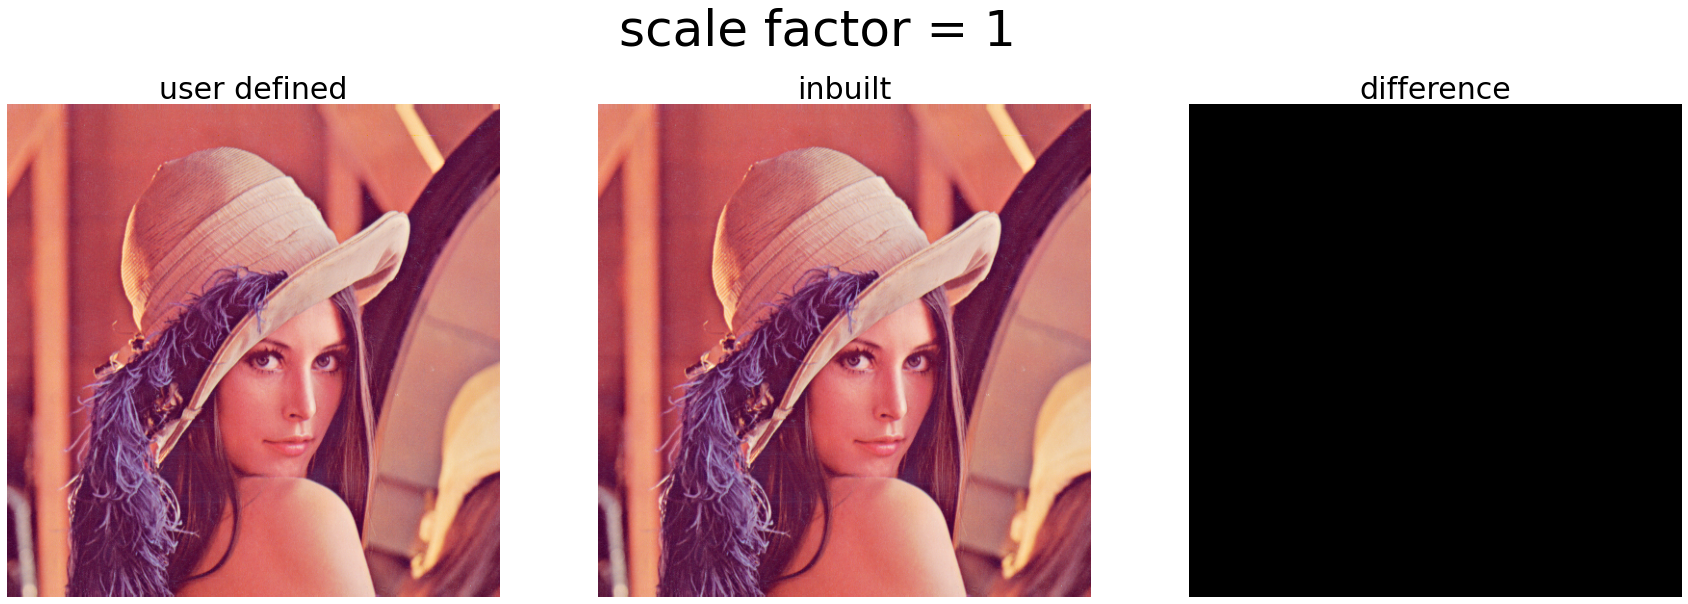

mean error (difference from the output of inbuilt function) = 0.00 or 0.00%


In [86]:
fig,(user_defined,inbuilt,difference)=plt.subplots(nrows=1,ncols=3,figsize=(30,10))
fig.suptitle("scale factor = 1",fontsize=50)
user_defined.axis('off')
inbuilt.axis('off')
difference.axis('off')
user_defined.set_title('user defined',fontsize=30)
inbuilt.set_title('inbuilt',fontsize=30)
difference.set_title('difference',fontsize=30)

user_defined_scaled=bilinear_scaling(img,1)
inbuilt_scaled=cv2.resize(img,(512,512),cv2.INTER_LINEAR)

user_defined.imshow(cv2.cvtColor(user_defined_scaled,cv2.COLOR_BGR2RGB))
inbuilt.imshow(cv2.cvtColor(inbuilt_scaled,cv2.COLOR_BGR2RGB))
diff_img=np.abs(cv2.cvtColor((inbuilt_scaled-user_defined_scaled),cv2.COLOR_BGR2RGB).astype(np.int8))
difference.imshow(diff_img)

plt.show()

err=np.sum(diff_img)/512**2
print("mean error (difference from the output of inbuilt function) = %.2f or %.2f"%(err,err/255*100)+r"%")

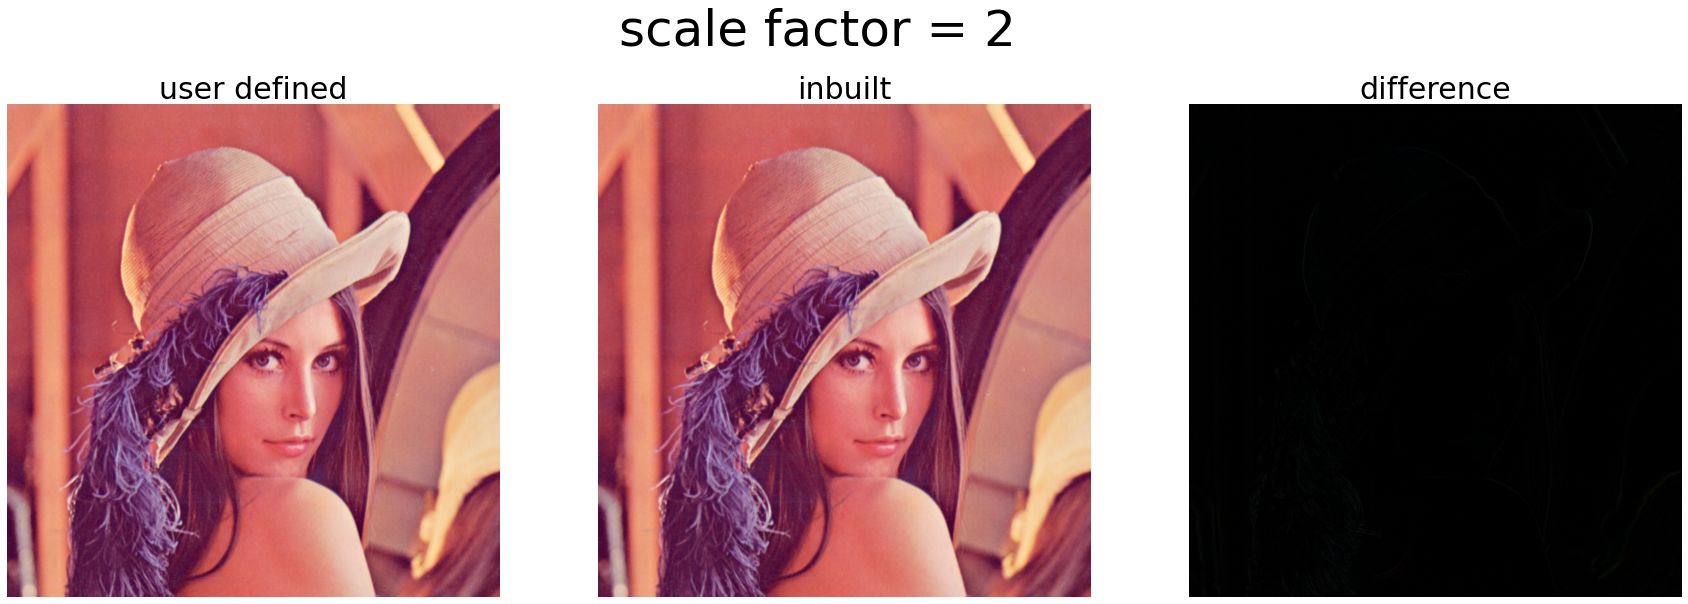

mean error (difference from the output of inbuilt function) = 3.24 or 1.27%


In [87]:
fig,(user_defined,inbuilt,difference)=plt.subplots(nrows=1,ncols=3,figsize=(30,10))
fig.suptitle("scale factor = 2",fontsize=50)
user_defined.axis('off')
inbuilt.axis('off')
difference.axis('off')
user_defined.set_title('user defined',fontsize=30)
inbuilt.set_title('inbuilt',fontsize=30)
difference.set_title('difference',fontsize=30)
 
user_defined_scaled=bilinear_scaling(img,2)
inbuilt_scaled=cv2.resize(img,(1023,1023),cv2.INTER_LINEAR)
 
user_defined.imshow(cv2.cvtColor(user_defined_scaled,cv2.COLOR_BGR2RGB))
inbuilt.imshow(cv2.cvtColor(inbuilt_scaled,cv2.COLOR_BGR2RGB))
difference.imshow(np.absolute((inbuilt_scaled-user_defined_scaled).astype(np.int8)))
diff_img=np.abs(cv2.cvtColor((inbuilt_scaled-user_defined_scaled),cv2.COLOR_BGR2RGB).astype(np.int8))
difference.imshow(diff_img)
 
plt.show()
 
err=np.sum(diff_img)/1023**2
print("mean error (difference from the output of inbuilt function) = %.2f or %.2f"%(err,err/255*100)+r"%")

In [88]:
b_u, g_u, r_u = cv2.split(user_defined_scaled)
b_i, g_i, r_i = cv2.split(inbuilt_scaled)

print("USERDEF")
for x in range(5):
    for y in range(5):
        print(b_u[x][y], end=' ')
    print()

print("INBUILT")
for x in range(5):
    for y in range(5):
        print(b_i[x][y], end=' ')
    print()
# print(b_u.shape)
# print((b_u[:3]).shape)

USERDEF
125 125 125 129 133 
125 125 125 129 133 
125 125 125 129 133 
125 125 125 129 133 
125 125 125 129 133 
INBUILT
125 125 125 127 131 
125 125 125 127 131 
125 125 125 127 131 
125 125 125 127 131 
125 125 125 127 131 


# Question 5

# Question 6 and 7

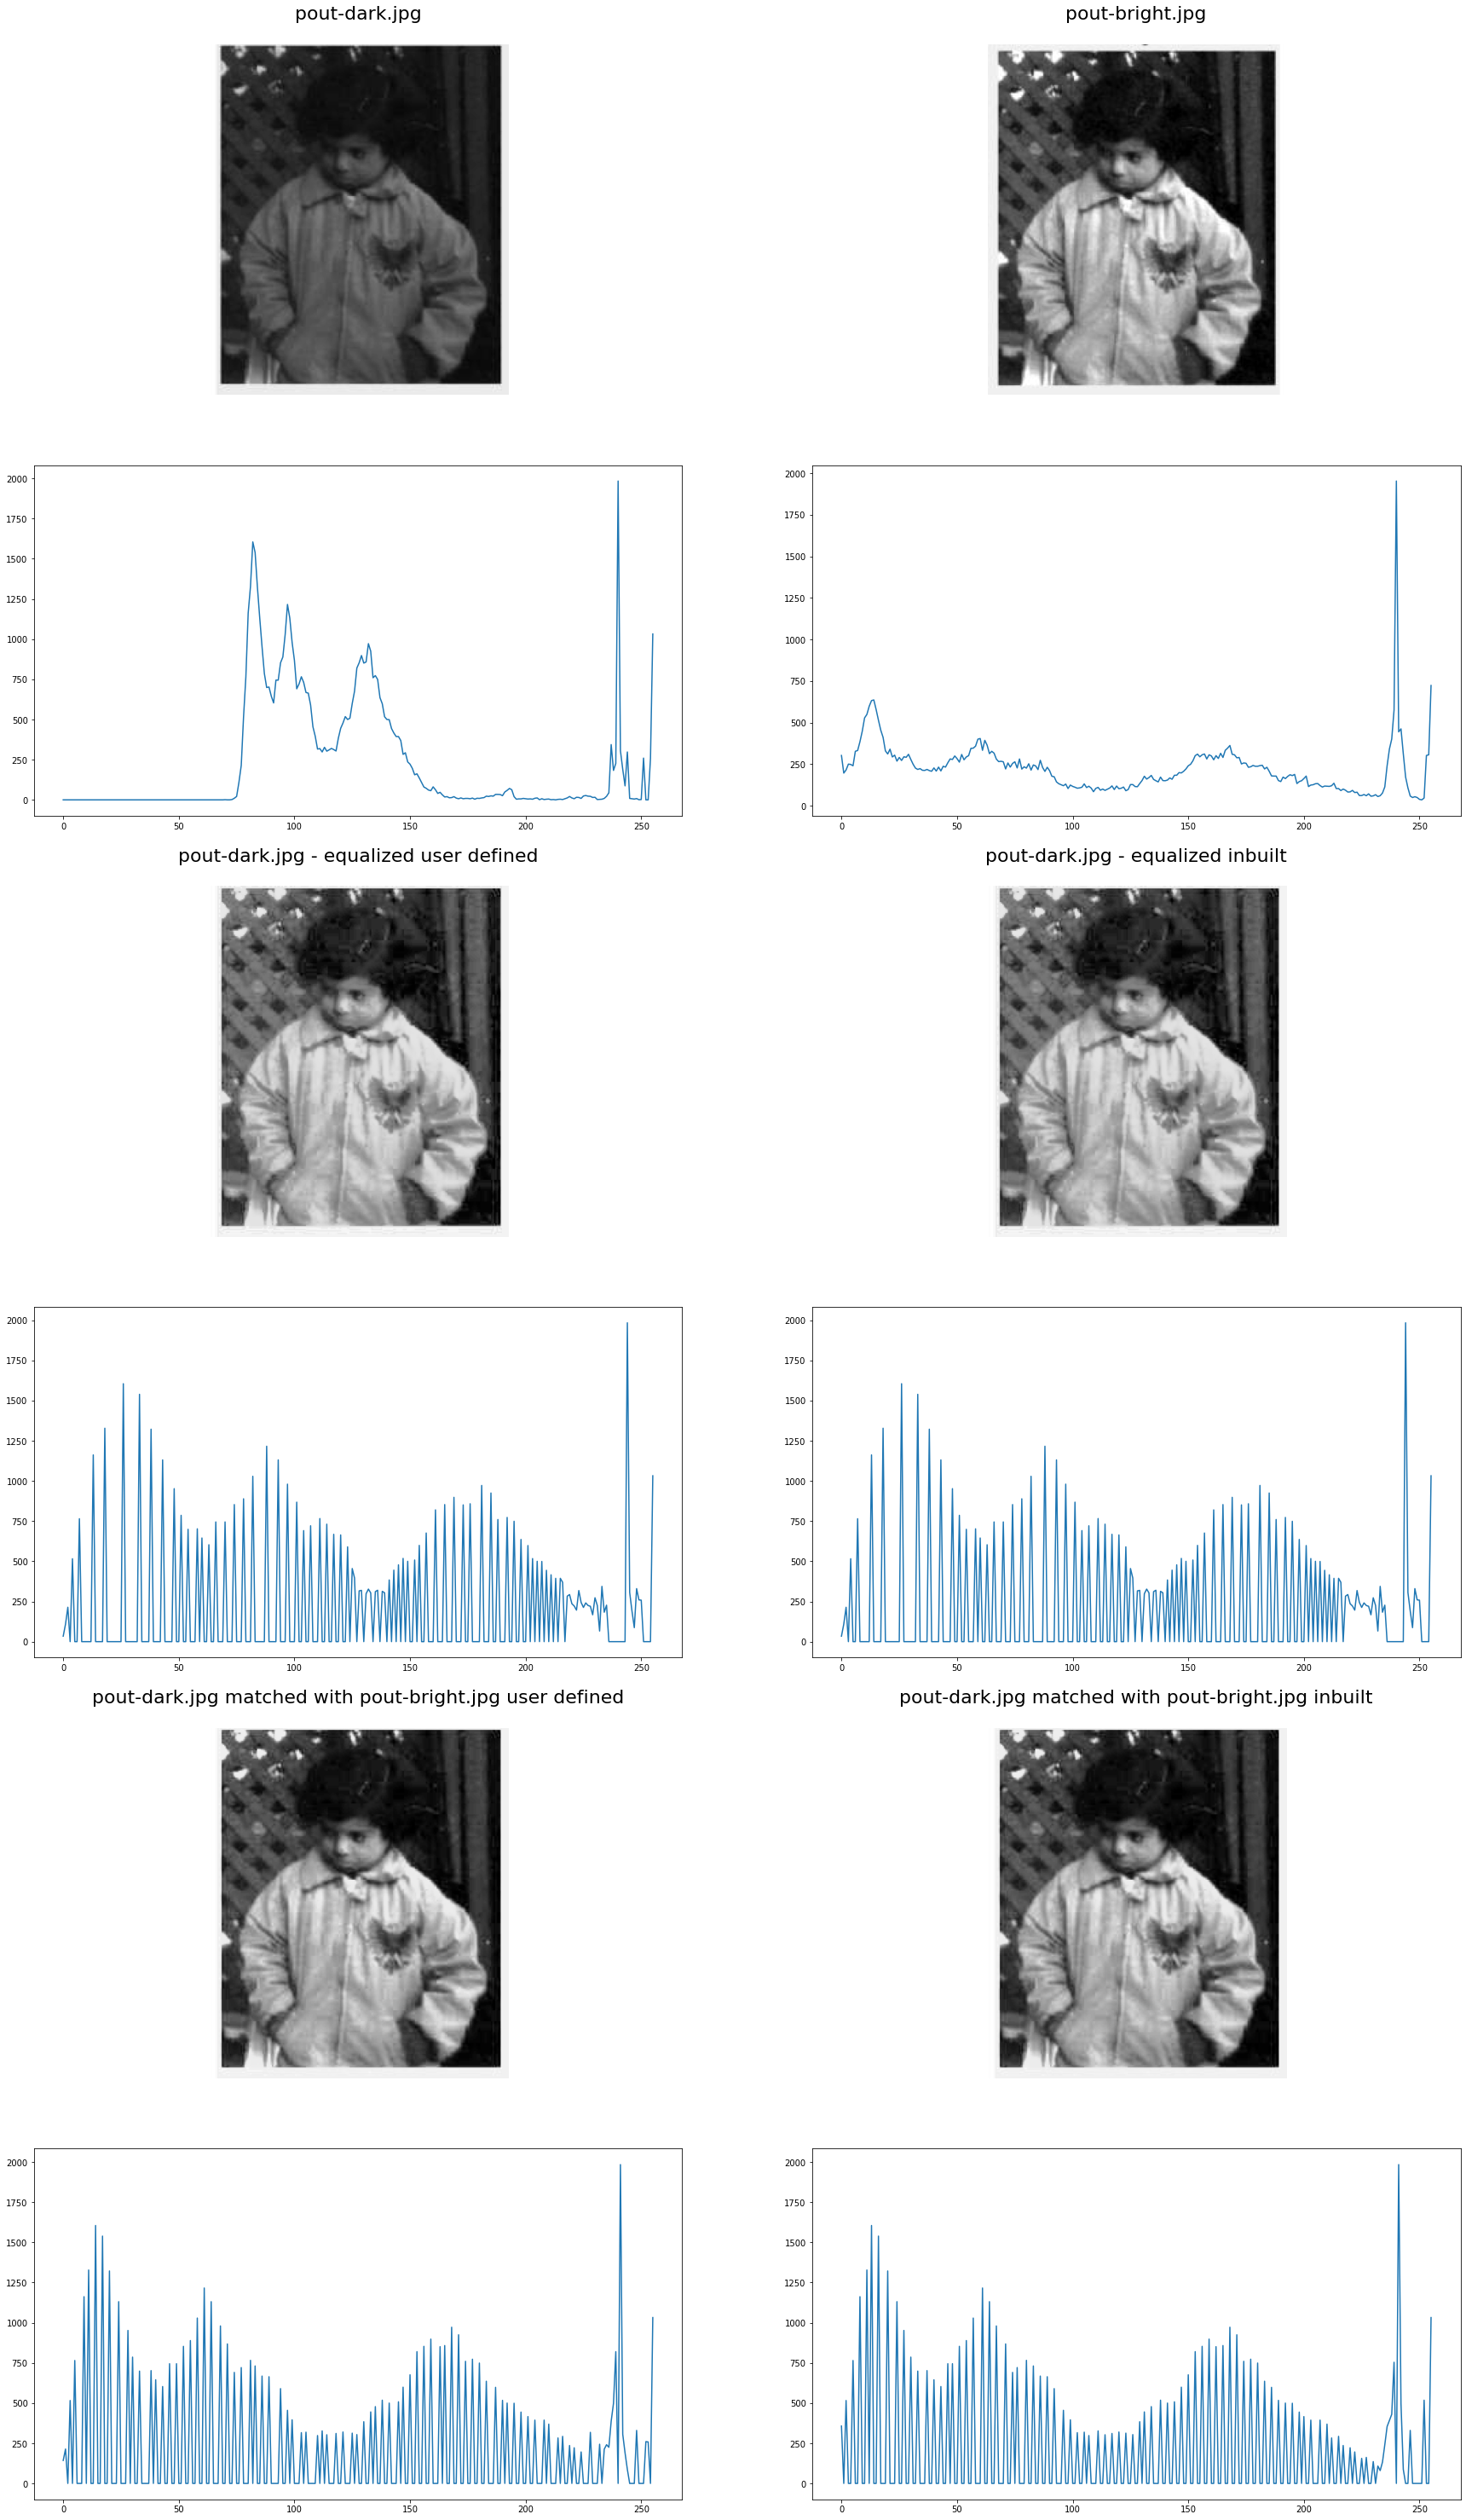

In [89]:
import cv2, numpy as np
from skimage import exposure
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def equalize_hist(img):

  freq=np.array(cv2.calcHist([img],[0],None,[256],[0,256]))

  cum_freq=np.zeros_like(freq)
  cum_freq[0]=freq[0]
  for i in range(1,len(freq)):
    cum_freq[i]=cum_freq[i-1]+freq[i]

  sf=255.0/(img.shape[0]*img.shape[1])

  map=[]
  for i in range(256):
    map.append(np.round(cum_freq[i]*sf))
	
  equalized_img=np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      equalized_img[i][j]=map[img[i][j]]

  return equalized_img.astype(np.uint8),np.array(map).astype(np.uint8)

def match_hist(dest_img,source_img):

  eq_dest,map_dest=equalize_hist(dest_img)
  eq_source,map_source=equalize_hist(source_img)

  map_source_inv=[-1 for i in range(256)]
  for i in range(256):
    # print(map_source[i])
    map_source_inv[map_source[i][0]]=i

  while map_source_inv.count(-1)!=0:
    for i in range(256):
      if map_source_inv[i]==-1:
        c1 = i!=0 and map_source_inv[i-1]!=-1
        c2 = i!=255 and map_source_inv[i+1]!=-1
        if c1 and c2:
          map_source_inv[i]=(map_source_inv[i-1]+map_source_inv[i+1])/2
        elif c1:
          map_source_inv[i]=map_source_inv[i-1]
        elif c2:
          map_source_inv[i]=map_source_inv[i+1]

  matched_img=np.zeros_like(dest_img)

  for i in range(dest_img.shape[0]):
    for j in range(dest_img.shape[1]):
      matched_img[i][j]=map_source_inv[eq_dest[i][j]]

  return matched_img.astype(np.uint8)
 
pout_dark=cv2.imread("pout-dark.jpg",0)
pout_bright=cv2.imread("pout-bright.jpg",0)
 
pout_equalized_inbuilt=cv2.equalizeHist(pout_dark)
pout_matched_inbuilt=exposure.match_histograms(pout_dark,pout_bright).astype(np.uint8)

pout_equalized_user_def,map=equalize_hist(pout_dark)
pout_matched_user_def=match_hist(pout_dark,pout_bright)

fig,elements=plt.subplots(nrows=6,ncols=2,figsize=(30,50))
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
 
elements[0,0].set_title('pout-dark.jpg\n',fontsize=22)
elements[0,0].imshow(pout_dark,cmap="gray")
elements[0,1].set_title('pout-bright.jpg\n',fontsize=22)
elements[0,1].imshow(pout_bright,cmap="gray")

elements[1,0].plot(cv2.calcHist([pout_dark],[0],None,[256],[0,256]))
elements[1,1].plot(cv2.calcHist([pout_bright],[0],None,[256],[0,256]))

elements[2,0].set_title('pout-dark.jpg - equalized user defined\n',fontsize=22)
elements[2,0].imshow(pout_equalized_user_def,cmap="gray")
elements[2,1].set_title('pout-dark.jpg - equalized inbuilt\n',fontsize=22)
elements[2,1].imshow(pout_equalized_inbuilt,cmap="gray")

elements[3,0].plot(cv2.calcHist([pout_equalized_user_def],[0],None,[256],[0,256]))
elements[3,1].plot(cv2.calcHist([pout_equalized_inbuilt],[0],None,[256],[0,256]))

elements[4,0].set_title('pout-dark.jpg matched with pout-bright.jpg user defined\n',fontsize=22)
elements[4,0].imshow(pout_matched_user_def,cmap="gray")
elements[4,1].set_title('pout-dark.jpg matched with pout-bright.jpg inbuilt\n',fontsize=22)
elements[4,1].imshow(pout_matched_inbuilt,cmap="gray")

elements[5,0].plot(cv2.calcHist([pout_matched_user_def],[0],None,[256],[0,256]))
elements[5,1].plot(cv2.calcHist([pout_matched_inbuilt],[0],None,[256],[0,256]))
 
for i in [0,2,4]:
  elements[i,0].axis('off')
  elements[i,1].axis('off')
 
plt.show()